6a)

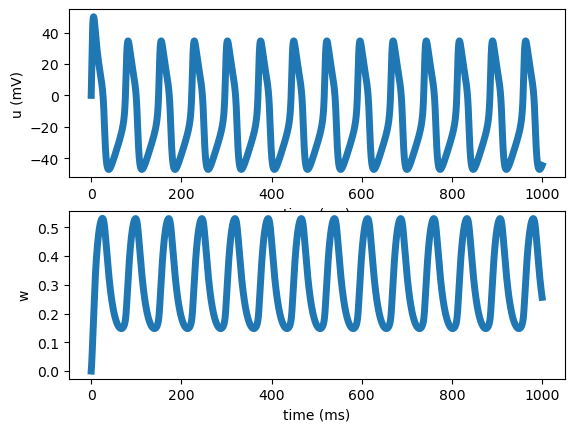

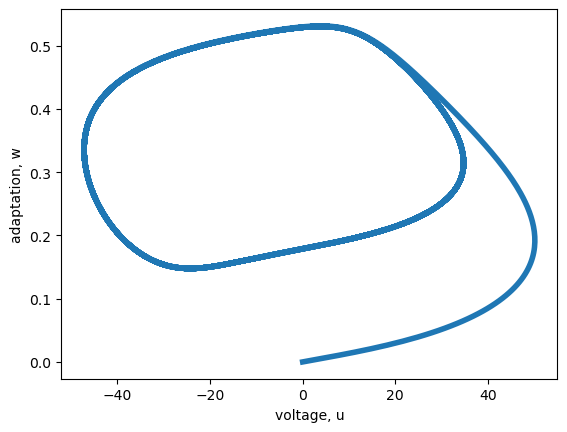

In [143]:
# 6b
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

tau_w = 25.0; 
g1 = 4.4; 
g2 = 8.0; 
gL = 2.0; 
V1 = 120.0 
V2 = -84.0
VL = -60.0 
u1 = -1.2
u2 = 18.0 
u3 = 2.0
u4 = 30.0 
C = 20.0
I = 120.0 

# time vector
T = 1000.0
tvec = np.linspace(0, T, 10000)

#U_0
def m_not(u): 
    return 0.5 * (1 + np.tanh((u - u1)/u2))
#W_0
def w_not(u): 
    return 0.5 * (1 + np.tanh((u - u3)/u4))
#Tau(u)
def tau(u): 
    return tau_w / (np.cosh((u - u3) /(2*u4)))


def compute_derivatives(y, t0): 
    dy = np.zeros((2,)); 
    
    Um = y[0]; 
    W = y[1]; 
    
    
    #Du/dt
    dy[0] = ((-g1 * m_not(Um) * (Um - V1)) - (g2 * W*(Um - V2)) - (gL* (Um-VL)) + I)/C 
    
    
    #Dw/dt
    dy[1] = -(1/tau(Um)) * (W - w_not(Um))
   
    return dy; 


# State of U, W
Y = np.array([0.0,0.0])

#Solve ODE Model 
# Uy = (Um[t0:tmax], W[t0:tmax])
Uy = odeint(compute_derivatives, Y, tvec)


fig,axes = plt.subplots(2)
axes[0].plot(tvec, Uy[:, 0],linewidth=5) # U 
axes[1].plot(tvec, Uy[:, 1],linewidth=5) # W 
axes[0].set_xlabel('time (ms)')
axes[0].set_ylabel('u (mV)')
axes[1].set_xlabel('time (ms)')
axes[1].set_ylabel('w')
plt.show()


fig = plt.figure()  
plt.plot(Uy[:,0],Uy[:,1],linewidth=4.0) # Phase plane 
plt.xlabel('voltage, u')
plt.ylabel('adaptation, w')
plt.show()

It seems that every 70ms we obtain a spike. Especially from spike 1 and 2. 

$6b)$

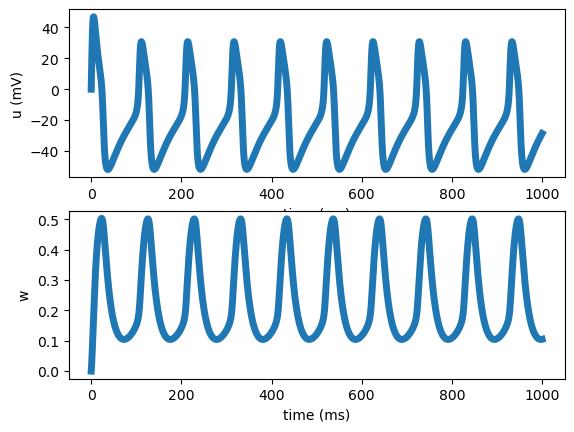

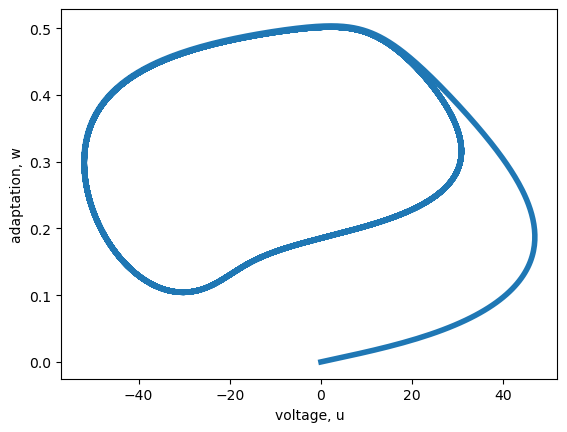

In [239]:
# 6b
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

tau_w = 25.0; 
g1 = 4.4; 
g2 = 8.0; 
gL = 2.0; 
V1 = 120.0 
V2 = -84.0
VL = -60.0 
u1 = -1.2
u2 = 18.0 
u3 = 2.0
u4 = 30.0 
C = 20.0
I = 90.0 

# time vector
T = 1000.0
tvec = np.linspace(0, T, 10000)

#U_0
def m_not(u): 
    return 0.5 * (1 + np.tanh((u - u1)/u2))
#W_0
def w_not(u): 
    return 0.5 * (1 + np.tanh((u - u3)/u4))
#Tau(u)
def tau(u): 
    return tau_w / (np.cosh((u - u3) /(2*u4)))


def compute_derivatives(y, t0): 
    dy = np.zeros((2,)); 
    
    Um = y[0]; 
    W = y[1]; 
    
    
    #Du/dt
    dy[0] = ((-g1 * m_not(Um) * (Um - V1)) - (g2 * W*(Um - V2)) - (gL* (Um-VL)) + I)/C 
    
    
    #Dw/dt
    dy[1] = -(1/tau(Um)) * (W - w_not(Um))
   
    return dy; 


# State of U, W
Y = np.array([0.0,0.0])

#Solve ODE Model 
# Uy = (Um[t0:tmax], W[t0:tmax])
Uy = odeint(compute_derivatives, Y, tvec)


fig,axes = plt.subplots(2)
axes[0].plot(tvec, Uy[:, 0],linewidth=5) # U 
axes[1].plot(tvec, Uy[:, 1],linewidth=5) # W 
axes[0].set_xlabel('time (ms)')
axes[0].set_ylabel('u (mV)')
axes[1].set_xlabel('time (ms)')
axes[1].set_ylabel('w')
plt.show()


fig = plt.figure()  
plt.plot(Uy[:,0],Uy[:,1],linewidth=4.0) # Phase plane 
plt.xlabel('voltage, u')
plt.ylabel('adaptation, w')
plt.show()

Playing around with the initial conditions I noticed that when $88 \leq I \leq 216$, we had periodic spiking with all parameters as initially. Setting $I = 90$ and having all other parameters as before, $ 4.4 \leq g \leq 6.2$ showed periodic spiking and $-0.2 \leq g_L \leq 2.0$ showed periodic spiking. 

$6c)$

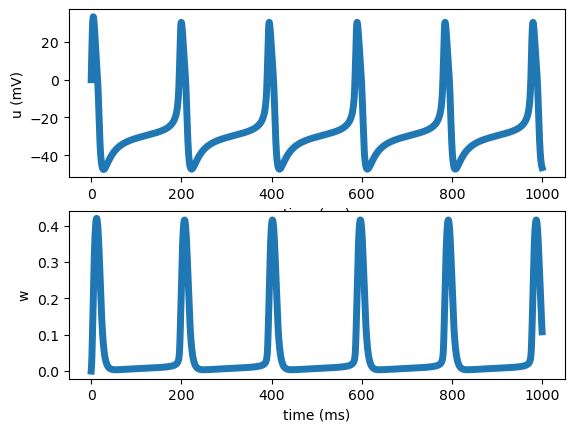

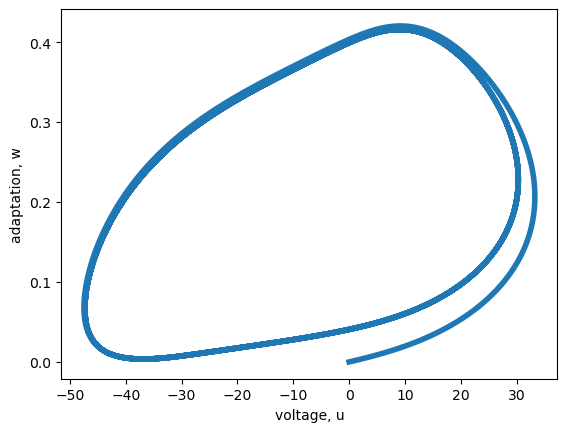

In [268]:
# 6b
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

tau_w = 15.0; 
g1 = 4.0; 
g2 = 8.0; 
gL = 2.0; 
V1 = 120.0 
V2 = -84.0
VL = -60.0 
u1 = -1.2
u2 = 18.0 
u3 = 12.0
u4 = 17.4 
C = 20.0
I = 41.01 

# time vector
T = 1000.0
tvec = np.linspace(0, T, 10000)

#U_0
def m_not(u): 
    return 0.5 * (1 + np.tanh((u - u1)/u2))
#W_0
def w_not(u): 
    return 0.5 * (1 + np.tanh((u - u3)/u4))
#Tau(u)
def tau(u): 
    return tau_w / (np.cosh((u - u3) /(2*u4)))


def compute_derivatives(y, t0): 
    dy = np.zeros((2,)); 
    
    Um = y[0]; 
    W = y[1]; 
    
    
    #Du/dt
    dy[0] = ((-g1 * m_not(Um) * (Um - V1)) - (g2 * W*(Um - V2)) - (gL* (Um-VL)) + I)/C 
    
    
    #Dw/dt
    dy[1] = -(1/tau(Um)) * (W - w_not(Um))
   
    return dy; 


# State of U, W
Y = np.array([0.0,0.0])

#Solve ODE Model 
# Uy = (Um[t0:tmax], W[t0:tmax])
Uy = odeint(compute_derivatives, Y, tvec)


fig,axes = plt.subplots(2)
axes[0].plot(tvec, Uy[:, 0],linewidth=5) # U 
axes[1].plot(tvec, Uy[:, 1],linewidth=5) # W 
axes[0].set_xlabel('time (ms)')
axes[0].set_ylabel('u (mV)')
axes[1].set_xlabel('time (ms)')
axes[1].set_ylabel('w')
plt.show()


fig = plt.figure()  
plt.plot(Uy[:,0],Uy[:,1],linewidth=4.0) # Phase plane 
plt.xlabel('voltage, u')
plt.ylabel('adaptation, w')
plt.show()